# Business Understanding

## Introduction
Traffic accidents are a critical public safety issue, causing injuries, fatalities and significant economic losses. Stakeholders such as traffic authorities and emergency services often face challenges in predicting and mitigating injury severity in crashes. Understanding the factors influencing injury outcomes can inform better policies, resource allocation and public safety to reduce injury severity and save lives.

## Use Cases
- Use the model to identify high-risk conditions (eg. weather, lighting, etc.) and implement measures like improved signage, speed limits or road design to reduce injury severity in traffic accidents.
- Predict the severity of injuries based on crash conditions, enabling emergency services to prioritize resources and respond more effectively to severe accidents. 

## Value Proposition
This project aims to develop a classification model that predicts injury severity in traffic crashes. By identifying key high-risk contributing to severe injuries, stakeholders can implement proactive measures to:
    - Reduce injury severity in traffic accidents through ad-hoc interventions
    - Enhance decision-making and resource allocation for emergency services
    - Improve public safety and save lives

# Business Objective
- The task is to predict the severity of injuries based on the given features:
    - Environment: The environment in which the accident occurred.
        - POSTED_SPEED_LIMIT: The posted speed limit.
        - WEAHTER_CONDITION: The weather condition.
        - LIGHTING_CONDITION: The lighting condition.
        - ROADWAY_SURFACE_COND: The roadway surface condition.
        - ROAD_DEFECT: Whether or not the road was defective.
        - TRAFFICWAY_TYPE: The type of trafficway.
        - TRAFFIC_CONTROL_DEVICE: The traffic control device present at the location of the accident.
    - Crash Dynamics: The dynamics of the crash.
        - FIRST_CRASH_TYPE: The type of the first crash.
        - TRAFFICWAY_TYPE: The type of trafficway.
        - ALIGNMENT: The alignment of the road.
        - LANE_CNT: The number of through lanes in either direction.
        - CRASH_HOUR: The hour of the crash.
        - CRASH_DAY_OF_WEEK: The day of the week of the crash.
        - CRASH_MONTH: The month of the crash.
    - Human Factors:
        - PRIM_CONTRIBUTORY_CAUSE: The primary contributory cause of the accident.
        - SEC_CONTRIBUTORY_CAUSE: The secondary contributory cause of the accident.
        - HIT_AND_RUN_I: Whether or not the crash involved a hit and run.
        - NOT_RIGHT_OF_WAY_I: Whether or not the crash involved a violation of the right of way.
        - WORK_ZONE_I: Whether or not the crash occurred in a work zone.
    - Location Factors:
        - LATITUDE: The latitude of the location of the crash.
        - LONGITUDE: The longitude of the location of the crash.
        - BEAT_OF_OCCURRENCE: The police beat of occurrence.
    - Target:
        - MOST_SEVERE_INJURY: Multi-class classification target (eg. FATAL, INCAPACITATING INJURY, NONINCAPACITATING INJURY, REPORTED, NO INJURY).


# Data Understanding

## Introduction
The dataset contains information about traffic accidents in Chicago. Stakeholders need reliable data-driven insights to mitigate injury severity and optimize their strategies. The dataset in this project is directly related to the task of predicting injury severity in traffic accidents.

## Data Description
- The dataset includes detailed records of traffic accidents covering various features such as environment, crash dynamics, human factors, location factors and target variable MOST_SEVERE_INJURY.

## Data Quality
- The dataset is very large with over 400,000 records and 49 features, providing a rich source of information for analysis.
- The dataset comes from the City of Chicago's [open data portal](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if) and is updated daily making it a reliable source of information for stakeholders.

## Data Relevance
- Use data on crash conditions (eg. weather) to identify high-risk conditions take proative measures.
- Predict injury severity to prioritize emergency services and allocate resources more effectively. 

## Conclusion
The dataset is robust, relevant and continually updated, making it an indispensable resource for the task of predicting injury severity in traffic accidents. 

# Data Preparation

## Assembly
- The source data is comprised of three CSV files:
    - [Crash Data](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if/about_data)
    - [Driver/Passenger Data](https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d/about_data)
    - [Vehicles Data](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3/about_data)
- The data will be assembled into a single dataset by joining the three tables on the common key CRASH_RECORD_ID.

## Cleaning
- Irrelevant columns that do not contribute to the task will be dropped.
- Missing values that will be imputed or dropped.

## Transformation
- Categorical features will be encoded using one-hot encoding.
- Numerical features will be scaled using standard scaling.

## Splitting
- The dataset will be split into training and testing sets using a standard 80/20 split.
- These sets will be saved to disk for future use as:
    - [X_train](./data/X_train.csv)
    - [X_test](./data/X_test.csv)
    - [y_train](./data/y_train.csv)
    - [y_test](./data/y_test.csv)

# Modeling

## Import Libraries

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_selection import f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.sparse import hstack
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin



/var/folders/zp/h7t69w7n1jvg_7vxjttlw77c0000gn/T/ipykernel_80737/77570600.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Load Data

In [44]:
# load data
data = pd.read_csv('./data/Traffic_Crashes_-_Crashes_20250122.csv')
data_vehicles = pd.read_csv('./data/Traffic_Crashes_-_Vehicles_20250122.csv')
data_people = pd.read_csv('./data/Traffic_Crashes_-_People_20250122.csv')

/var/folders/zp/h7t69w7n1jvg_7vxjttlw77c0000gn/T/ipykernel_62867/710280419.py:3: DtypeWarning: Columns (18,20,22,23,39,40,41,42,43,47,48,49,50,51,52,53,54,55,56,57,58,59,60,68,69,70) have mixed types. Specify dtype option on import or set low_memory=False.
  data_vehicles = pd.read_csv('./data/Traffic_Crashes_-_Vehicles_20250122.csv')
/var/folders/zp/h7t69w7n1jvg_7vxjttlw77c0000gn/T/ipykernel_62867/710280419.py:4: DtypeWarning: Columns (19,28) have mixed types. Specify dtype option on import or set low_memory=False.
  data_people = pd.read_csv('./data/Traffic_Crashes_-_People_20250122.csv')


In [45]:
# merge data
data = data.merge(data_vehicles, on='CRASH_RECORD_ID')
data = data.merge(data_people, on='CRASH_RECORD_ID')

## Intial Clean Up
- Drop features unlikely to influence injury severity.
    - ids
    - location
    - date/time
    - miscellaneous
    - vehicle details
    - hazmat details
    - commerical vehicle details

## Data Preprocessing
- Handle missing values using imputation or dropping.
- Drop columns with a high rate (> 50%) missing values.
- Select relevant features for the task.
    - Chi-squared test for categorical feature selection.
    - ANOVA test for numerical feature selection.

In [46]:
# calculate null percentages
null_percentage = data.isnull().mean() * 100

# drop columns with more than 50% missing values
columns_to_drop = null_percentage[null_percentage > 50].index
data = data.drop(columns=columns_to_drop)

### Imputing Missing Values
- Numerical features missing values will be imputed using the median.
- Categorical features missing values will be imputed using the mode.

In [47]:
# fill categorical columns with mode
for column in data.select_dtypes(include='object').columns:
    mode_value = data[column].mode()[0]
    data[column] = data[column].fillna(mode_value)

# fill numerical columns with median
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    median_value = data[column].median()
    data[column] = data[column].fillna(median_value)

## Preprocessing
- Select relevant features using feature importance 
    - Chi-squared test for categorical features
    - ANOVA test for numerical features

In [49]:
# define categorical and numerical columns
categorical = data.select_dtypes(include='object').columns
numerical = data.select_dtypes(include=['float64', 'int64']).columns

### Categorical
- drop features unlikely to influence injury severity.
    - ids
    - location
    - date/time
    - miscellaneous
    - vehicle details
    - hazmat details
    - commerical vehicle details

In [50]:
categorical_drop = [

    # IDs
    'CRASH_RECORD_ID', 'PERSON_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO', 'UN_NO', 'EMS_RUN_NO', 'IDOT_PERMIT_NO',

    # Dates
    'DATE_POLICE_NOTIFIED', 'CRASH_DATE_EST_I', 'CRASH_DATE_x', 'CRASH_DATE_x', 'CRASH_DATE_y', 'DATE_ACCIDENT', 'DATE_POLICE_NOTIFIED', 'CRASH_DATE_EST_I', 'CRASH_DATE', 


    # Geographic
    'CITY', 'STATE', 'ZIPCODE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'STREET_NAME', 'STREET_DIRECTION', 'CARRIER_STATE', 'CARRIER_CITY', 'STREET_NO', 'BEAT_OF_OCCURRENCE', 'TRAVEL_DIRECTION'

    # # Misc.
    'TOWED_BY', 'TOWED_TO', 'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I', 'AREA_04_I', 'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I', 'AREA_09_I', 'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I', 'WORK_ZONE_TYPE',

    'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WIDE_LOAD_I', 'REPORT_TYPE', 'CRASH_TYPE'

    # # Vehicle
    'VEHICLE_ID', 'MAKE', 'MODEL', 'LIC_PLATE_STATE', 'TRAILER1_WIDTH', 'TRAILER2_WIDTH',
    
    # # hazzardous materials
    'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'HAZMAT_PRESENT_I', 'HAZMAT_REPORT_I', 'HAZMAT_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I', 'HAZMAT_OUT_OF_SERVICE_I'

    # # commercial vehicle
    'COMMERCIAL_SRC', 'CARGO_BODY_TYPE', 'VEHICLE_CONFIG', 'GVWR', 'CARRIER_NAME', 'MCS_VIO_CAUSE_CRASH_I', 'MCS_REPORT_I', 'MCS_REPORT_NO', 'MCS_OUT_OF_SERVICE_I',

    # high/inf VIF
    'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'CRASH_UNIT_ID', 'VEHICLE_ID_x', 'VEHICLE_ID_y',
    
    # related to target
    'INJURY_CLASSIFICATION',
    'INJURIES_NO_INDICATION',
    'INJURIES_UNKNOWN',

    # maybe
    'VEHICLE_USE',
    'UNIT_TYPE',
    'VEHICLE_DEFECT'

]


In [51]:
data = data.drop(columns=categorical_drop, errors='ignore')

### Significance Testing
- Perform chi-squared test for categorical features.
- Perform ANOVA test for numerical features.
- Perform Variance Inflation Factor (VIF) to check for multicollinearity.

### Chi-Squared Test
- Test the independence between categorical features and the target variable.
- Drop features with p-value > 0.05.

In [52]:
# Chi-Square transformer
class ChiSquareTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05):
        self.threshold = threshold
        self.selected_indices = None
        self.encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    def fit(self, X, y):
        X_encoded = self.encoder.fit_transform(X)
        chi2_scores, p_values = chi2(X_encoded, y)
        self.selected_indices = np.where(p_values < self.threshold)[0]
        return self

    def transform(self, X):
        X_encoded = self.encoder.transform(X)
        return X_encoded[:, self.selected_indices]


### ANOVA Test
- Test the significance of numerical features on the target variable.
- Drop features with p-value > 0.05.

In [54]:
# ANOVA transformer
class ANOVATransformer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05):
        self.threshold = threshold
        self.selected_indices = None
        self.scaler = StandardScaler()

    def fit(self, X, y):
        X_scaled = self.scaler.fit_transform(X)
        f_scores, p_values = f_classif(X_scaled, y)
        self.selected_indices = np.where(p_values < self.threshold)[0]
        return self

    def transform(self, X):
        X_scaled = self.scaler.transform(X)
        return X_scaled[:, self.selected_indices]

### Variance Inflation Factor (VIF)

In [56]:
# custom VIF transformer
class VIFTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=5.0):
        self.threshold = threshold
        self.features_to_keep = None

    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        self.features_to_keep = X.columns.tolist()

        while True:
            vif_data = pd.DataFrame({
                'Feature': self.features_to_keep,
                'VIF': [variance_inflation_factor(X[self.features_to_keep].values, i) for i in range(len(self.features_to_keep))]
            })
            max_vif = vif_data['VIF'].max()
            if max_vif > self.threshold:
                feature_to_remove = vif_data.loc[vif_data["VIF"].idxmax(), "Feature"]
                self.features_to_keep.remove(feature_to_remove)
            else:
                break
        return self
    
    def transform(self, X):
        return X[self.features_to_keep]

    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X)

# preprocessor for all columns using VIF
vif_transformer = ColumnTransformer(
    transformers=[
        ('vif', VIFTransformer()),
    ],
    remainder='passthrough'
)

In [57]:
# identify and filter high VIF features
def calculate_vif(X, threshold=10):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [
        variance_inflation_factor(X.values, i) for i in range(X.shape[1])
    ]
    high_vif_features = vif_data[vif_data["VIF"] > threshold]["Feature"].tolist()
    return high_vif_features

# automatically drop high VIF columns
high_vif_features = calculate_vif(data.select_dtypes(include=['float64', 'int64']))
data = data.drop(columns=high_vif_features, errors="ignore")


In [1]:
# checkpoint 1
data.to_csv('./checkpoint/data_checkpoint_1.csv', index=False)

NameError: name 'data' is not defined

In [4]:
# load data
data = pd.read_csv('./checkpoint/data_checkpoint_1.csv')

# print columns in data
print(data.columns)

# print value counts for all columns
for column in data.columns:
    print(data[column].value_counts())

Index(['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'MOST_SEVERE_INJURY', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'UNIT_NO', 'UNIT_TYPE',
       'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE', 'TRAVEL_DIRECTION',
       'MANEUVER', 'OCCUPANT_CNT', 'FIRST_CONTACT_POINT', 'PERSON_TYPE', 'SEX',
       'AGE', 'DRIVERS_LICENSE_STATE', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED',
       'EJECTION', 'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION',
       'BAC_RESULT'],
      dtype='object')
TRAFFIC_CONTROL_DEVICE
NO CONTROLS                 2108622
TRAFFIC SIGNAL              1390852
STOP SIGN/FLASHER            474186
UNKNOWN                      163834
OTHER                         27005
YIELD                          718

# Model

### Model Pipeline
- Use a StandardScaler to scale the numerical features.
- Use SMOTE to handle class imbalance.
- Use Logistic Regression as the classification model.
- Fit the model on the training set.

In [ ]:
# assign feature and target variables
X = data.drop(columns='MOST_SEVERE_INJURY')
y = data['MOST_SEVERE_INJURY']

# select categorical and numerical columns from X
categorical = X.select_dtypes(include='object').columns.tolist()
numerical = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# define numerical and categorical transformers
numerical_transformer = Pipeline([
    ('anova', ANOVATransformer()),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('chi2', ChiSquareTransformer()),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
])

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical),
        ('categorical', categorical_transformer, categorical)
    ],
    # parallelize operations
    n_jobs=-1  
    )

# create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),

    ## SMOTE overfits the model
    # ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(
        random_state=42,
        max_iter=100,
        class_weight='balanced',
        penalty='l2',
        C=1.0
    ))
])

# fit pipeline
pipeline.fit(X_train, y_train)

# predict
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

### Classification Report

### Confusion Matrix

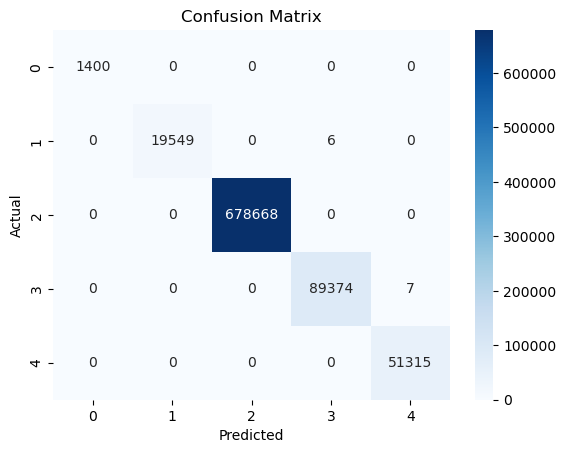

In [ ]:
# create and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# create and display the classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1400
           1       1.00      1.00      1.00     19555
           2       1.00      1.00      1.00    678668
           3       1.00      1.00      1.00     89381
           4       1.00      1.00      1.00     51315

    accuracy                           1.00    840319
   macro avg       1.00      1.00      1.00    840319
weighted avg       1.00      1.00      1.00    840319



### Cross-Validation

In [ ]:
# cross validate the model
cross_val_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-validated scores: {cross_val_scores}')

cross_val_scores

KeyboardInterrupt: 

In [77]:
cross_val_scores

array([0.99424177, 0.99383567, 0.99370626, 0.99452142, 0.99290745])